In [1]:
from fairsearchcore.models import FairScoreDoc
import math
import sys
import warnings
warnings.filterwarnings("ignore")
import fairsearchcore as fsc
import sys
import numpy as np
import pandas as pd


In [3]:
%store -r queries_uk_l
%store -r df_u1
%store -r df_uVideo
%store -r queries_uk_v

In [6]:
def build_ranking_model(is_protected_list):
    size = len(is_protected_list)
    unfair_ranking = []
    for i in range(size):
        unfair_ranking.append(FairScoreDoc((size-i), (size-i), is_protected_list[i]))
    return unfair_ranking

In [7]:
def is_ranking_fair(ranking, p, k, alpha=0.1):

    fair = fsc.Fair(k, p, alpha)
    return fair.is_fair(ranking)

In [8]:
def get_min_size_elements(df, queries, source, country, min_elements=10, tag_name='query'):
    min_size = float('inf')
    min_query = ""
 
    for q in queries:
        size = len(df[(df[tag_name]==q) & (df['source'] == source) ])
        print(size)
        print(q)

        if (size < min_size) and (size >= min_elements):
            min_size = size
            print (min_size)

            min_query = q
            print (q)
            print("\n")
            print("{: >20} {: >10}".format(q,size))
    
    
    print("\n")
    print("{: >20} {: >10}".format(q,size))
    
    return min_size

In [9]:
def sex_discrimination(row, protected_sex='female'):
    
    return (row['gender'] == protected_sex or None or 'unknown')        
#    return row['gender'] == protected_sex         
#    return row['gender'] != 'male'         



In [10]:
def get_fairness_metrics(df, queries, source, country, discrimination_function, positional_arguments, n, tag_name='query'):
    protected_lists = []
    q_list=[]
    p_max_list=[]
    p_values = [0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98]
    print("{: >15} {: >10}".format("Query","p = True"))
    print('          '+'-'*20)
    if discrimination_function == old_age_discrimination or discrimination_function == young_age_discrimination:
        median = 35
        print("Median age= ",median)

    for q in sorted(list(queries)):
        df_u1_res = df[(df[tag_name] == q) & (df['source'] == source) & (df['country'] == country)].sort_values('#')[:n]
        df_u1_res.head()
        if len(df_u1_res) == n: # if it has the minimum number of elements (minimum number of elements without unknowns for all queries)
            is_protected_list = []
            for i in range(len(df_u1_res)):
                if discrimination_function == old_age_discrimination or discrimination_function == young_age_discrimination:
                    condition = discrimination_function(df_u1_res.iloc[i], median)
                else:
                    condition = discrimination_function(df_u1_res.iloc[i],positional_arguments['protected_value'])
                if condition:
                    is_protected_list.append(True)
                else:
                    is_protected_list.append(False)
            #print(is_protected_list)
            protected_lists.append(is_protected_list)
            ranking = build_ranking_model(is_protected_list)

            is_fair_list = list([bool(is_ranking_fair(ranking,p, n)) for p in p_values])
            if True in is_fair_list:
                p_index = len(is_fair_list) - 1 - is_fair_list[::-1].index(True)
                p_max = p_values[p_index]
            else:
                p_max = "-"
            #print(is_fair_list)
            if len(q) > 15: 
                q = q[:11]+'.'
            print("{: >15} {: >10}".format(q,p_max))
            q_list.append(q)
            p_max_list.append(p_max)
    return q_list,p_max_list

In [9]:
#df_u1_sex_filtered=df_u1
df_u1_sex_filtered = df_u1[(df_u1['gender'] != None) & (df_u1['gender'] != 'unknown')]
df_u1_experience_filtered = df_u1[(df_u1['experience_level'] != None) & (df_u1['experience_level'] != 'unknown')]

In [10]:
queries_l = queries_uk_l 

Source: Linkedin 
Country:  United Kingdom


In [13]:
for q in sorted(queries_uk_l):
        df_15 = df_u1_sex_filtered[(df_u1_sex_filtered['query'] == q) & (df_u1_sex_filtered['source'] == 'linkedin')].sort_values('#')[:15]

In [54]:
export_csv = df_15.to_csv (r'Unknown_removed.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [12]:
min_size = get_min_size_elements(df_u1_sex_filtered, queries_l, source='linkedin', country='United Kigndom')
print("Ranking size: ",min_size)


24
architect
24
architect


           architect         24
24
chef
25
consultant
24
dentist
25
designer
24
developer
23
doctor
23
doctor


              doctor         23
25
economist
25
engineer
25
firefighter
24
gardener
23
hairdresser
23
instructor
22
judge
22
judge


               judge         22
22
mechanic
25
nurse
25
pharmacist
25
photographer
25
physiotherapist
23
pilot
23
plumber
25
postman
22
psychiatrist
24
psychologist
21
radiographer
21
radiographer


        radiographer         21
23
recruiter
25
reporter
25
salesman
24
scientist
25
secretary
25
surveyor
23
teacher
23
veterinarian
24
writer


              writer         24
Ranking size:  21


In [ ]:
min_size = get_min_size_elements(df_uv_sex_filtered, queries_uk_v, source='linkedin', country='United Kigndom')
print("Ranking size: ",min_size)

In [14]:
q,p_max=get_fairness_metrics(df_u1_sex_filtered, queries_l, 'linkedin', 'United Kigndom', sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size)

Protected group: female

          Query   p = True
          --------------------
      architect        0.7
           chef        0.5
     consultant        0.6
        dentist        0.5
       designer        0.7
      developer        0.5
         doctor        0.6
      economist        0.6
       engineer        0.5
    firefighter        0.4
       gardener        0.3
    hairdresser        0.8
     instructor        0.8
          judge        0.6
       mechanic        0.2
          nurse        0.9
     pharmacist        0.6
   photographer        0.6
physiotherapist        0.7
          pilot        0.1
        plumber        0.4
        postman        0.2
   psychiatrist        0.6
   psychologist       0.98
   radiographer        0.7
      recruiter        0.9
       reporter        0.6
       salesman        0.4
      scientist        0.5
      secretary        0.7
       surveyor        0.7
        teacher        0.7
   veterinarian        0.7
         writer        0.6

In [57]:
export_csv = df_u1_sex_filtered.to_csv (r'df_u1_sex_notfiltered.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [26]:
q,p_max_Unknown_nonProtected=get_fairness_metrics(df_u1, queries_l, 'linkedin', 'United Kigndom', sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size)

          Query   p = True
          --------------------
      architect        0.7
           chef        0.4
     consultant        0.6
        dentist        0.5
       designer        0.6
      developer        0.5
         doctor        0.6
      economist        0.6
       engineer        0.3
    firefighter        0.4
       gardener        0.2
    hairdresser        0.8
     instructor        0.7
          judge        0.5
       mechanic        0.2
          nurse        0.8
     pharmacist        0.6
   photographer        0.6
physiotherapist        0.7
          pilot        0.1
        plumber        0.1
        postman        0.2
   psychiatrist        0.4
   psychologist        0.9
   radiographer        0.7
      recruiter        0.9
       reporter        0.6
       salesman        0.2
      scientist        0.4
      secretary        0.7
       surveyor        0.7
        teacher        0.7
   veterinarian        0.6
         writer        0.6


In [28]:
q,p_max_Unknown_Protected=get_fairness_metrics(df_u1, queries_l, 'linkedin', 'United Kigndom', sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size)

          Query   p = True
          --------------------
      architect        0.7
           chef        0.6
     consultant        0.6
        dentist        0.6
       designer        0.7
      developer        0.6
         doctor        0.7
      economist        0.6
       engineer        0.5
    firefighter        0.4
       gardener        0.3
    hairdresser        0.9
     instructor        0.8
          judge        0.6
       mechanic        0.2
          nurse        0.9
     pharmacist        0.8
   photographer        0.7
physiotherapist        0.8
          pilot        0.1
        plumber        0.7
        postman        0.3
   psychiatrist        0.7
   psychologist       0.98
   radiographer        0.9
      recruiter        0.9
       reporter        0.7
       salesman        0.4
      scientist        0.6
      secretary        0.8
       surveyor        0.8
        teacher        0.7
   veterinarian        0.9
         writer        0.8


In [29]:
df = pd.DataFrame({'Uk_R': p_max,'Uk_M': p_max_Unknown_nonProtected,'Uk_F': p_max_Unknown_Protected}, index=q)

In [33]:
export_csv = df.to_csv (r'df_uK_fairness_results.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [17]:
df	=	pd.read_csv("/home/mulham/desktop/PhD_courses/job-search-discrimination-code-master/src/data-analysis/df_uK_fairness_results.csv",sep=";")


In [34]:
df_split = np.array_split(df, 3)


In [36]:
df_split[0].head()

,Uk_F,Uk_M,Uk_R
architect,0.7,0.7,0.7
chef,0.6,0.4,0.4
consultant,0.6,0.6,0.6
dentist,0.6,0.5,0.5
designer,0.7,0.6,0.7


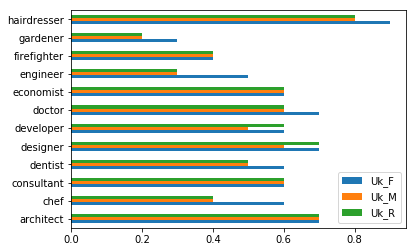

In [39]:
ax = df_split[0].plot.barh(rot=0)

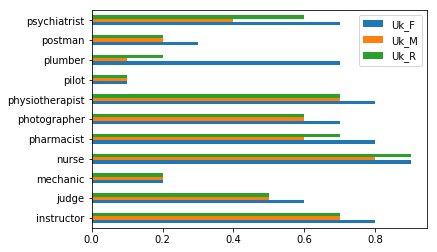

In [40]:
ax = df_split[1].plot.barh(rot=0)

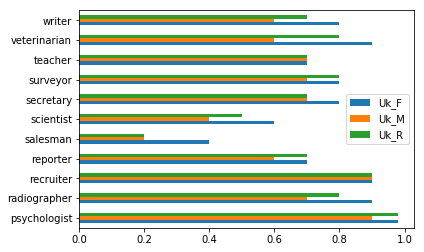

In [41]:
ax = df_split[2].plot.barh(rot=0)

In [83]:
%store -r df_u2
%store -r f_queries_co
%store -r intersection
%store -r f_queries_co


In [84]:
def print_fairness_statistics_u2(country):
    if country == 'Spain':
        queries = f_queries_es
    elif country == 'Colombia':
        queries = f_queries_co 
    elif country == 'Mexico':
        queries = f_queries_mx
    else:
        print("Wrong country")
        return
    
    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_sex_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected sex: female\n")
    get_fairness_metrics(df_u2_sex_filtered, queries, 'top doctors', country, sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size, tag_name='speciality')
    
    
    print("Source: Top doctors \nCountry: ",country)
#    min_size = get_min_size_elements(df_u2_age_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    
    if min_size > 0:
        print("Ranking size: ",min_size)
        print("Protected sex: old people\n")
        get_fairness_metrics(df_u2_age_filtered, queries, 'top doctors', country, old_age_discrimination, {'df':df_u1}, min_size, tag_name='speciality')


        print("Source: Top doctors \nCountry: ",country)
        min_size = get_min_size_elements(df_u2_age_filtered, queries, source='top doctors', country=country, tag_name='speciality')
        print("Ranking size: ",min_size)
        print("Protected sex: young people\n")
        get_fairness_metrics(df_u2_age_filtered, queries, 'top doctors', country, young_age_discrimination, {'df':df_u1}, min_size, tag_name='speciality')

       
    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_nationality_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected group: foreigner people\n")
    get_fairness_metrics(df_u2_nationality_filtered, queries, 'top doctors', country, nationality_discrimination, {'df':df_u1, 'protected_value':'foreigner'}, min_size, tag_name='speciality')

    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_nationality_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected group: not foreigner people\n")
    get_fairness_metrics(df_u2_nationality_filtered, queries, 'top doctors', country, nationality_discrimination, {'df':df_u1, 'protected_value':'not foreigner'}, min_size, tag_name='speciality')
    

In [85]:
df_u2 = df_u2[df_u2['speciality'].isin(intersection)] 

df_u2_sex_filtered = df_u2[(df_u2['gender']!=None) & (df_u2['gender']!='unknown')]
df_u2_age_filtered = df_u2[df_u2.age.notnull() & df_u2.age.dropna()]
df_u2_nationality_filtered = df_u2[df_u2.Is_foreigner.notnull() & (df_u2['Is_foreigner']!='unknown') & (df_u2['Is_foreigner']!='tooshort')]

In [86]:
def print_fairness_statistics_u2(country):
    if country == 'Spain':
        queries = f_queries_es
    elif country == 'Colombia':
        queries = f_queries_co 
    elif country == 'Mexico':
        queries = f_queries_mx
    else:
        print("Wrong country")
        return
    
    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_sex_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected sex: female\n")
    get_fairness_metrics(df_u2_sex_filtered, queries, 'top doctors', country, sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size, tag_name='speciality')
    
    
    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_age_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    
    if min_size > 0:
        print("Ranking size: ",min_size)
        print("Protected sex: old people\n")
        get_fairness_metrics(df_u2_age_filtered, queries, 'top doctors', country, old_age_discrimination, {'df':df_u1}, min_size, tag_name='speciality')


        print("Source: Top doctors \nCountry: ",country)
        min_size = get_min_size_elements(df_u2_age_filtered, queries, source='top doctors', country=country, tag_name='speciality')
        print("Ranking size: ",min_size)
        print("Protected sex: young people\n")
        get_fairness_metrics(df_u2_age_filtered, queries, 'top doctors', country, young_age_discrimination, {'df':df_u1}, min_size, tag_name='speciality')

       
    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_nationality_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected group: foreigner people\n")
    get_fairness_metrics(df_u2_nationality_filtered, queries, 'top doctors', country, nationality_discrimination, {'df':df_u1, 'protected_value':'foreigner'}, min_size, tag_name='speciality')

    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_nationality_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected group: not foreigner people\n")
    get_fairness_metrics(df_u2_nationality_filtered, queries, 'top doctors', country, nationality_discrimination, {'df':df_u1, 'protected_value':'not foreigner'}, min_size, tag_name='speciality')

In [87]:
def print_fairness_statistics_u2(country):
    if country == 'Spain':
        queries = f_queries_es
    elif country == 'Colombia':
        queries = f_queries_co 
    elif country == 'Mexico':
        queries = f_queries_mx
    else:
        print("Wrong country")
        return
    queries
    print("Source: Top doctors \nCountry: ",country)
    min_size = get_min_size_elements(df_u2_sex_filtered, queries, source='top doctors', country=country, tag_name='speciality')
    print("Ranking size: ",min_size)
    print("Protected sex: female\n")
    get_fairness_metrics(df_u2_sex_filtered, queries, 'top doctors', country, sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size, tag_name='speciality')
    

In [88]:
sys.stdout = open('fairness_colombia_u2.txt', 'w')
print_fairness_statistics_u2(country='Colombia')

In [88]:
min_size = get_min_size_elements(df_u2_sex_filtered, f_queries_co, source='top doctors', country='Colombia', tag_name='speciality')


In [90]:
print("Ranking size: ",min_size)


In [75]:
df_u2_sex_filtered.head()

,source,country,speciality,#,gender,ethnicity,Is_foreigner,age,experience_level,was_awarded,has_photo,num_stars,num_reviews
117,top doctors,Colombia,cirugia oral y maxilofacial,0,male,hispanic,False,NaN,NaN,False,True,0.0,0
118,top doctors,Colombia,cirugia oral y maxilofacial,1,male,hispanic,False,40.0,senior2-level,False,True,5.0,1
119,top doctors,Colombia,cirugia oral y maxilofacial,1,male,hispanic,False,NaN,senior2-level,False,True,5.0,1
120,top doctors,Colombia,cirugia oral y maxilofacial,2,male,hispanic,False,NaN,senior2-level,False,True,0.0,0
121,top doctors,Colombia,cirugia oral y maxilofacial,2,female,hispanic-english,False,NaN,NaN,False,True,0.0,0


In [76]:
f_queries_co

['angiologia y cirugia vascular',
 'cardiologia adultos',
 'cirugia general',
 'cirugia oral y maxilofacial',
 'cirugia plastica estetica y reparadora',
 'dermatologia',
 'endocrinologia',
 'gastroenterologia especialidad',
 'ginecologia y obstetricia',
 'medicina estetica',
 'neurocirugia',
 'odontologia y estomatologia',
 'oftalmologia',
 'otorrinolaringologia',
 'pediatria',
 'psicologia',
 'psiquiatria',
 'reumatologia',
 'traumatologia y ortopedia',
 'urologia']

In [92]:
get_fairness_metrics(df_u2_sex_filtered, f_queries_co, 'top doctors', 'Colombia', sex_discrimination, {'df':df_u1, 'protected_value':'female'}, min_size, tag_name='speciality')


In [48]:
def experience_to_number(argument): 
    switcher = { 
        "senior2-level":85, 
        'senior1-level':80, 
        'mid-level':75,
        'entry-level':70,
    } 
  
    # get() method of dictionary data type returns  
    # value of passed argument if it is present  
    # in dictionary otherwise second argument will 
    # be assigned as default value of passed argument 
    return switcher.get(argument, 60) 

In [49]:
col_names =  ['query', 'famel_med_bia', 'male_med_bia']
my_df  = pd.DataFrame(columns = col_names)

In [52]:
med_famel=0
med_male=0

famel_num_l=[]
male_num_l=[]
male_exp_l=[]
famel_exp_l=[]
for q in sorted(queries_uk_l):
    count_famel=0
    count_male=0
    famel_exp=0
    male_exp=0
    quary=q 
    df_15 = df_u1_sex_filtered[(df_u1_sex_filtered['query'] == q) & (df_u1_sex_filtered['source'] == 'linkedin')].sort_values('#')[:15]
    for index, row in df_15.iterrows():
        if (row['gender'] == 'female'):
            count_famel=count_famel+1
            
            famel_exp=famel_exp+experience_to_number(row['experience_level'])
        elif (row['gender'] == 'male'):
            count_male=count_male+1
            male_exp=male_exp+experience_to_number(row['experience_level'])
        else:
            continue
    print(q)
    if(count_famel!=0):
        med_famel=famel_exp/count_famel
    if(count_male!=0):
        med_male=male_exp/count_male
    print('count_famel',count_famel) 
    print('count_male',count_male)    
    print('med_male',med_male)    
    print('med_famel',med_famel)    
    male_exp_l.append(med_male)
    famel_exp_l.append(med_famel)
    new_row ={'query':q, 'famel_med_bia':med_famel, 'male_med_bia':med_male}
            #append row to the dataframe
    my_df.append(new_row,ignore_index=True)
            
                    
        
            


architect
count_famel 9
count_male 6
med_male 80.83333333333333
med_famel 80.55555555555556
chef
count_famel 4
count_male 11
med_male 80.45454545454545
med_famel 85.0
consultant
count_famel 7
count_male 8
med_male 81.875
med_famel 77.85714285714286
dentist
count_famel 8
count_male 7
med_male 80.71428571428571
med_famel 80.625
designer
count_famel 9
count_male 6
med_male 82.5
med_famel 77.77777777777777
developer
count_famel 6
count_male 9
med_male 81.11111111111111
med_famel 79.16666666666667
doctor
count_famel 7
count_male 8
med_male 78.125
med_famel 81.42857142857143
economist
count_famel 7
count_male 8
med_male 82.5
med_famel 82.14285714285714
engineer
count_famel 6
count_male 9
med_male 79.44444444444444
med_famel 79.16666666666667
firefighter
count_famel 4
count_male 11
med_male 80.9090909090909
med_famel 85.0
gardener
count_famel 2
count_male 13
med_male 77.6923076923077
med_famel 82.5
hairdresser
count_famel 11
count_male 4
med_male 82.5
med_famel 82.72727272727273
instructor
co

In [55]:
famel_exp_l

[80.55555555555556,
 85.0,
 77.85714285714286,
 80.625,
 77.77777777777777,
 79.16666666666667,
 81.42857142857143,
 82.14285714285714,
 79.16666666666667,
 85.0,
 82.5,
 82.72727272727273,
 78.75,
 83.0,
 70.0,
 80.41666666666667,
 76.66666666666667,
 81.42857142857143,
 82.22222222222223,
 82.22222222222223,
 77.5,
 77.5,
 81.25,
 78.66666666666667,
 80.5,
 82.6923076923077,
 82.5,
 70.0,
 83.0,
 78.125,
 80.0,
 81.25,
 78.75,
 77.5]

In [80]:
my_df.head


<bound method NDFrame.head of Empty DataFrame
Columns: [query, famel_med_bia, male_med_bia]
Index: []>

In [68]:
exp_medList = pd.DataFrame(
    {'M_AVR': male_exp_l,
     'F_AVR': famel_exp_l}, index=queries_uk_l)


In [69]:
exp_medList_split = np.array_split(exp_medList, 3)


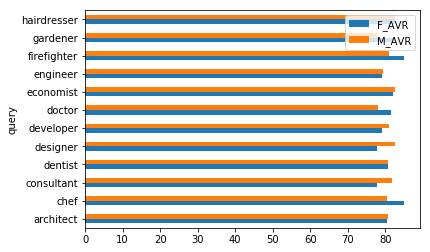

In [70]:
exp_medList_split = np.array_split(exp_medList, 3)

ax = exp_medList_split[0].plot.barh(rot=0)

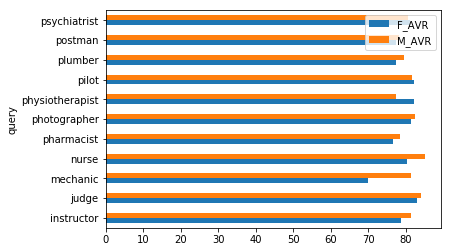

In [71]:
ax = exp_medList_split[1].plot.barh(rot=0)

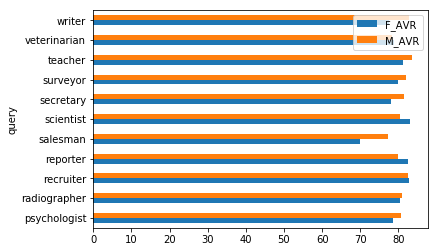

In [72]:
ax = exp_medList_split[2].plot.barh(rot=0)

In [67]:
export_csv = exp_medList.to_csv (r' difference in avg relevance.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [21]:
def get_bias(i): 
    log2 = math.log2(i+1)
    return  1/log2

In [22]:
get_bias(2)

0.6309297535714575

In [86]:
math.log2(1)

0.0

In [91]:
log2 = math.log(3, 2.0)


In [92]:
log2

1.5849625007211563

In [73]:
-for q in sorted(queries_uk_l):  
    famel_num_l=[]
    male_num_l=[]
    male_bia_l=[]
    famel_bia_l=[]
    count=0
    med_famel=0.0
    med_male=0.0
    count_famel=0
    count_male=0
    famel_bais=0
    male_bais=0
    quary=q 
    df_15 = df_u1_sex_filtered[(df_u1_sex_filtered['query'] == q) & (df_u1_sex_filtered['source'] == 'linkedin')].sort_values('#')[:15]
    for index, row in df_15.iterrows():
        
        if (row['gender'] == 'female'):
            count=count+1
            famel_bais=famel_bais+get_bias(count)
            count_famel=count_famel+1
            #print ('count',count)
            #print ('famel_bais',famel_bais)
            
        elif (row['gender'] == 'male'):
            count=count+1
            male_bais=male_bais+get_bias(count)
            count_male=count_male+1

            #print ('count',count)
            #print ('male_bais',male_bais)
            
        else:
            continue
    print(q)
    if(count_famel!=0):
        med_famel=famel_bais/count_famel
    if(count_male!=0):
        med_male=male_bais/count_male
#    print('count_famel',count_famel) 
#    print('count_male',count_male)    
    print('famel_bais',med_famel)    
    print('male_bais',med_male)    
    male_bia_l.append(med_male)
    famel_bia_l.append(med_famel)
    #new_row ={'query':q, 'famel_num':count_famel, 'male_num':count_male, 'famel_exp':famel_exp, 'male_exp':male_exp}
            #append row to the dataframe
    #my_df.append(new_row,ignore_index=True)
            

architect
famel_bais 0.41461721964380127
male_bais 0.3549655035365989
chef
famel_bais 0.3913128381256005
male_bais 0.39055424050103654
consultant
famel_bais 0.35936337809316826
male_bais 0.4182255439202034
dentist
famel_bais 0.30651899861534665
male_bais 0.4870280012987188
designer
famel_bais 0.4525859850927137
male_bais 0.2980123553632302
developer
famel_bais 0.36952766840207474
male_bais 0.40490910973348404
doctor
famel_bais 0.3848039004892874
male_bais 0.3959650868235991
economist
famel_bais 0.3511676073733407
male_bais 0.4253968433000525
engineer
famel_bais 0.28200595252703525
male_bais 0.46325692031684373
firefighter
famel_bais 0.5168823413269836
male_bais 0.34489260297326085
gardener
famel_bais 0.29166666666666663
male_bais 0.40600112805234395
hairdresser
famel_bais 0.4257925372100217
male_bais 0.2944075221758916
instructor
famel_bais 0.43775400121583274
male_bais 0.3370451411838774
judge
famel_bais 0.46575260511112243
male_bais 0.35325849724581915
mechanic
famel_bais 0.289064826

In [83]:
exp_medList = pd.DataFrame(
    {'M_AVE': male_bia_l,
     'F_AVE': famel_bia_l}, index=queries_uk_l)


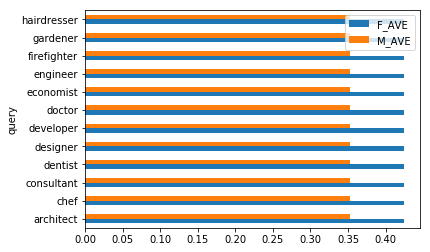

In [84]:
exp_medList_split = np.array_split(exp_medList, 3)

ax = exp_medList_split[0].plot.barh(rot=0)

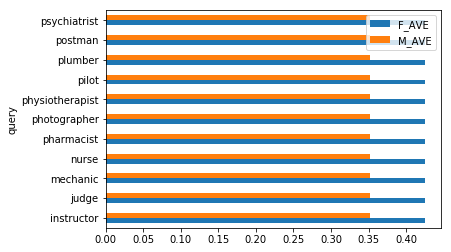

In [85]:
ax = exp_medList_split[1].plot.barh(rot=0)

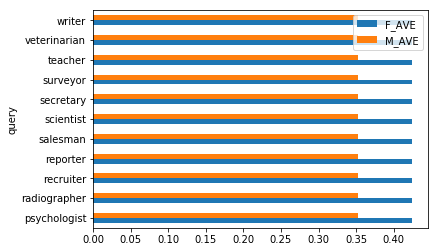

In [77]:
ax = exp_medList_split[2].plot.barh(rot=0)

In [82]:
export_csv = exp_medList.to_csv (r' difference in avg exposure.csv', header=True) #Don't forget to add '.csv' at the end of the path
